In [1]:
# general
from datetime import datetime
from dotenv import load_dotenv, find_dotenv
import os

# custom local libs
from function import baseball_lambda

Python REPL can execute arbitrary code. Use with caution.


In [2]:
# read local .env file
_ = load_dotenv(find_dotenv()) 

In [3]:
# set Langsmith project
today = datetime.now().strftime("%Y%m%d")
os.environ["LANGCHAIN_PROJECT"] = f"Baseball Strikeouts - {today}"

In [4]:
session_id = '0009'

In [5]:
task = '''Plot the cumulative sum of strikeouts thrown by Danny Duffy in the 2018 season.'''
result = baseball_lambda.execute_workflow(task, session_id)
print(result)

{'Orchestrate': {'next': 'Plan'}}
----
Distance to neareast plan: 0.8255935907363892
Formulating a new plan based on User input
Modifying plan with function metadata
UPDATE RESULT:

1. Use `playerid_lookup` to get Danny Duffy's MLBAM player ID:

```python
from pybaseball import playerid_lookup

duffy_id = playerid_lookup('duffy', 'danny')['key_mlbam'].values[0]
```

2. Use `statcast_pitcher` to retrieve Danny Duffy's pitch-level data for the 2018 season:

```python
from pybaseball import statcast_pitcher 

duffy_2018 = statcast_pitcher('2018-03-01', '2018-10-31', player_id=duffy_id)
```

3. Filter the data to only include strikeouts:

```python
strikeouts = duffy_2018.loc[duffy_2018['events'] == 'Strikeout']
```

4. Group the data by game date and sum the number of strikeouts:

```python
strikeouts_by_date = strikeouts.groupby('game_date').size().reset_index()
strikeouts_by_date.columns = ['game_date', 'strikeouts']
```

5. Calculate the cumulative sum of strikeouts:

```python
strikeo

In [6]:
task = '''Be sure your search for events is case insensitive"'''
result = baseball_lambda.execute_workflow(task, session_id)
print(result)

{'Orchestrate': {'next': 'Revise'}}
----
{'Revise': {'messages': [HumanMessage(content="\n1. Use `playerid_lookup` to get Danny Duffy's MLBAM player ID:\n\n```python\nfrom pybaseball import playerid_lookup\n\nduffy_id = playerid_lookup('duffy', 'danny')['key_mlbam'].values[0]\n```\n\n2. Use `statcast_pitcher` to retrieve Danny Duffy's pitch-level data for the 2018 season:\n\n```python\nfrom pybaseball import statcast_pitcher \n\nduffy_2018 = statcast_pitcher('2018-03-01', '2018-10-31', player_id=duffy_id)\n```\n\n3. Filter the data to only include strikeouts, using a case-insensitive search:\n\n```python\nstrikeouts = duffy_2018.loc[duffy_2018['events'].str.lower() == 'strikeout']\n```\n\n4. Group the data by game date and sum the number of strikeouts:\n\n```python\nstrikeouts_by_date = strikeouts.groupby('game_date').size().reset_index()\nstrikeouts_by_date.columns = ['game_date', 'strikeouts']\n```\n\n5. Calculate the cumulative sum of strikeouts:\n\n```python\nstrikeouts_by_date['cu

In [7]:
task = '''To calculate the cumulative sum, first count the number of strikeouts for each date and then calculate a cumulative sum across the dates."'''
result = baseball_lambda.execute_workflow(task, session_id)
print(result)

{'Orchestrate': {'next': 'Revise'}}
----
{'Revise': {'messages': [HumanMessage(content="\n1. Use `playerid_lookup` to get Danny Duffy's MLBAM player ID:\n\n```python\nfrom pybaseball import playerid_lookup\n\nduffy_id = playerid_lookup('duffy', 'danny')['key_mlbam'].values[0]\n```\n\n2. Use `statcast_pitcher` to retrieve Danny Duffy's pitch-level data for the 2018 season:\n\n```python\nfrom pybaseball import statcast_pitcher \n\nduffy_2018 = statcast_pitcher('2018-03-01', '2018-10-31', player_id=duffy_id)\n```\n\n3. Filter the data to only include strikeouts, using a case-insensitive search:\n\n```python\nstrikeouts = duffy_2018.loc[duffy_2018['events'].str.lower() == 'strikeout']\n```\n\n4. Count the number of strikeouts for each game date:\n\n```python\nstrikeouts_by_date = strikeouts.groupby('game_date').size().reset_index()\nstrikeouts_by_date.columns = ['game_date', 'strikeouts']\n```\n\n5. Sort the data by game date:\n\n```python\nstrikeouts_by_date = strikeouts_by_date.sort_valu

{'Orchestrate': {'next': 'Execute'}}
----
Executing: 
# Import required libraries
import pandas as pd
from pybaseball import playerid_lookup

# Use playerid_lookup to get Danny Duffy's MLBAM player ID
duffy_id = playerid_lookup('duffy', 'danny')['key_mlbam'].values[0]

Result: Gathering player lookup table. This may take a moment.

Executing: 
# Import required libraries
import pandas as pd
from pybaseball import playerid_lookup, statcast_pitcher

# Use playerid_lookup to get Danny Duffy's MLBAM player ID
duffy_id = playerid_lookup('duffy', 'danny')['key_mlbam'].values[0]

# Use statcast_pitcher to retrieve Danny Duffy's pitch-level data for the 2018 season
duffy_2018 = statcast_pitcher('2018-03-01', '2018-10-31', player_id=duffy_id)

Result: Gathering Player Data

Executing: 
# Import required libraries
import pandas as pd
from pybaseball import playerid_lookup, statcast_pitcher

# Use playerid_lookup to get Danny Duffy's MLBAM player ID
duffy_id = playerid_lookup('duffy', 'danny')['k

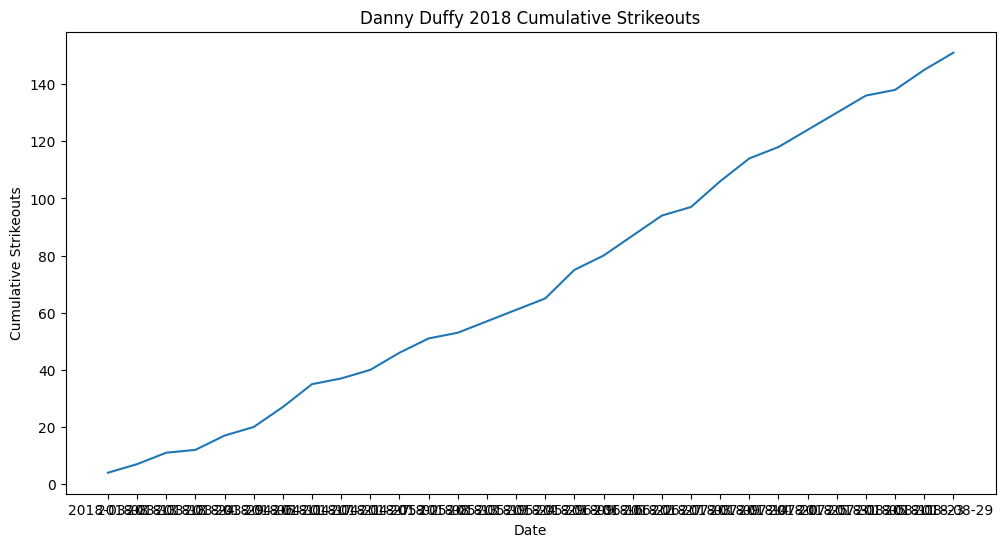

Result: Gathering Player Data

{'Execute': {'messages': [AIMessage(content="\nThe code above plots the cumulative sum of strikeouts thrown by Danny Duffy in the 2018 MLB season. The x-axis shows the game date, and the y-axis shows the running total of strikeouts up to that date. The plot visualizes how Duffy's strikeout totals accumulated over the course of the season.\n\nHere is the code that was used to reach this solution:\n\n```python\n\n\n# Import required libraries\nimport pandas as pd\nfrom pybaseball import playerid_lookup\n\n# Use playerid_lookup to get Danny Duffy's MLBAM player ID\nduffy_id = playerid_lookup('duffy', 'danny')['key_mlbam'].values[0]\n\n# Import required libraries\nimport pandas as pd\nfrom pybaseball import playerid_lookup, statcast_pitcher\n\n# Use playerid_lookup to get Danny Duffy's MLBAM player ID\nduffy_id = playerid_lookup('duffy', 'danny')['key_mlbam'].values[0]\n\n# Use statcast_pitcher to retrieve Danny Duffy's pitch-level data for the 2018 season\nd

In [8]:
task = "approved"
result = baseball_lambda.execute_workflow(task, session_id)
print(result)

In [9]:
task = "yes"
result = baseball_lambda.execute_workflow(task, session_id)
print(result)

{'Orchestrate': {'next': 'Memorize'}}
----
{'Memorize': {'messages': [AIMessage(content='Thank you, task has been commited to memory')], 'previous_node': 'Memorize'}}
----
Thank you, task has been commited to memory
